<a href="https://colab.research.google.com/github/shivangibithel/assignment2/blob/main/FaceRecognition/Face-Recognition-master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
dataset_path = '/content/drive/MyDrive/dataset/'
dataset_dir  = os.listdir(dataset_path)

width  = 92 
height = 112

## Face dataset

Train Images:


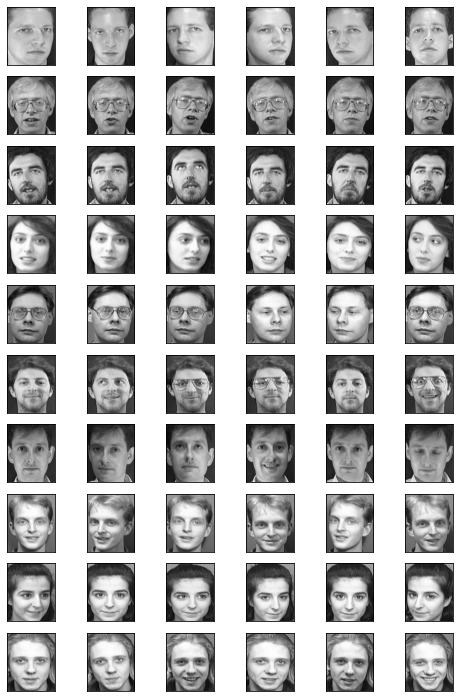

Test Images:


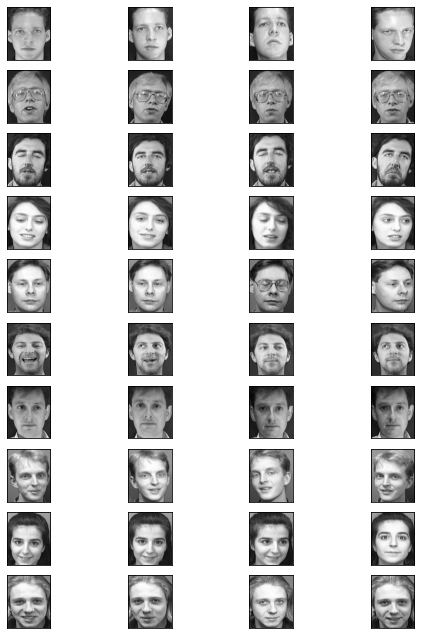

In [46]:
print('Train Images:')

# to store all the training images in an array
training_tensor   = np.ndarray(shape=(60, height*width), dtype=np.float64)

for i in range(60):
    img = plt.imread(dataset_path + 'training/'+str(i+1)+'.pgm')
    # copying images to the training array
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    # plotting the training images
    plt.subplot(10,6,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
    plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

print('Test Images:')
testing_tensor   = np.ndarray(shape=(40, height*width), dtype=np.float64)

for i in range(40):
    img = imread(dataset_path + 'test/'+str(i+1)+'.pgm')
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(11,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

## Mean Calculation

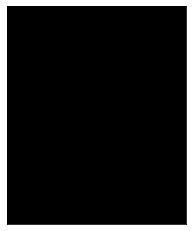

In [47]:
mean_face = np.zeros((1,height*width))

for i in pattern_matrix:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(pattern_matrix))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

## Do mean Zero

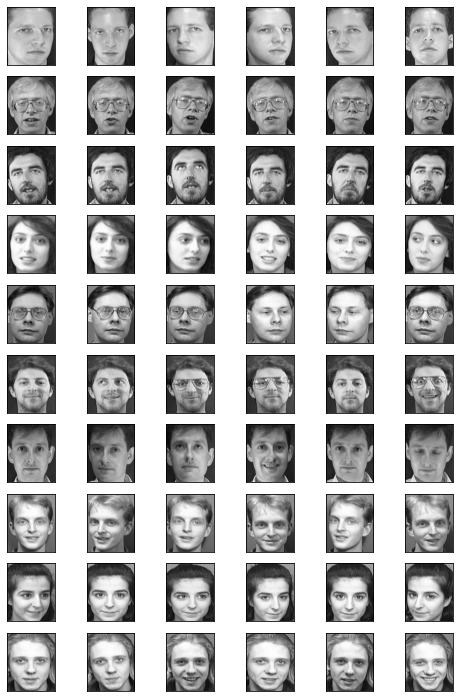

In [48]:
#normalized training set
normalised_training_tensor = np.ndarray(shape=(len(training_tensor), height*width))

for i in range(len(training_tensor)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

for i in range(len(training_tensor)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(10,6,1+i)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

## Covariance Matrix

In [49]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,60.0)
'60 is the number of images'
print('Covariance matrix of X:')
print(cov_matrix)

Covariance matrix of X:
[[26.7019812  18.62845593  4.99394354 ... 13.20539376  9.42376535
  10.06832184]
 [18.62845593 46.19726945 19.66095494 ... 27.46371191 24.95577487
  27.4935675 ]
 [ 4.99394354 19.66095494 37.62125341 ... 15.64865873 10.94863341
  17.07597096]
 ...
 [13.20539376 27.46371191 15.64865873 ... 44.15622229 32.95597049
  36.67764043]
 [ 9.42376535 24.95577487 10.94863341 ... 32.95597049 41.21628658
  33.70635725]
 [10.06832184 27.4935675  17.07597096 ... 36.67764043 33.70635725
  47.05327424]]


## Eigenvalues and eigenvectors

In [50]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X):')
print(eigenvectors)
print('Eigenvalues of Cov(X):',eigenvalues)

Eigenvectors of Cov(X):
[[-0.0641336  -0.1292667   0.03738438 ... -0.09239385 -0.14842168
  -0.16208639]
 [-0.12780789 -0.11796873  0.11353757 ... -0.07183711  0.06063823
  -0.05989224]
 [-0.06971616 -0.0143031   0.30616499 ...  0.0913565   0.08346019
   0.22792468]
 ...
 [-0.13868088 -0.05247872  0.04716647 ...  0.12911316  0.11693018
  -0.11062956]
 [-0.11057925 -0.08717884  0.01816869 ...  0.08917496 -0.26221409
   0.1198364 ]
 [-0.14079524  0.01350846  0.07858056 ... -0.31373154  0.04438388
  -0.07000013]]
Eigenvalues of Cov(X): [1483.71809473  183.07823924  158.82972413  126.56398027   89.56847121
   68.99956438   64.68189955   42.32936998   38.02655844   36.35791698
   30.60245781   26.71917612   24.30336183   21.78980728   21.11523825
   17.89714603   17.0784304    16.5225474    15.04495724   14.37877224
   13.13990071   12.54586402   12.29229853   11.14680473   10.33856311
   10.18213109    1.85375881    9.63701127    9.26350108    8.83240086
    2.45192176    8.04300873    7.9

## Feature vector --> choice of k

Cumulative proportion of variance explained vector: [0.53889241 0.60538717 0.66307476 0.70904331 0.74157494 0.76663586
 0.79012859 0.80550279 0.81931419 0.83251953 0.84363447 0.85333898
 0.86216606 0.87008021 0.87774935 0.88424966 0.89045262 0.89645367
 0.90191806 0.90714049 0.91191295 0.91646966 0.92093428 0.92498284
 0.92873785 0.93243604 0.93593624 0.93930078 0.94250875 0.94543
 0.9483232  0.95116453 0.95395476 0.95664485 0.95927802 0.96176782
 0.96413894 0.96634415 0.96847255 0.97055277 0.97252848 0.9744913
 0.97641248 0.97827011 0.98006662 0.98181344 0.98350609 0.98513236
 0.98668279 0.98821119 0.98969694 0.99113581 0.99247182 0.99375499
 0.99500328 0.99618009 0.99733019 0.99843616 0.99932671 1.        ]


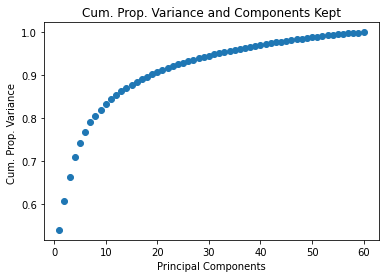

In [51]:
# get corresponding eigenvectors to eigen values
# so as to get the eigenvectors at the same corresponding index to eigen values when sorted
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Find cumulative variance of each principle component
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector:", var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance ')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [52]:
print('Number of eigen vectors:',len(eigvalues_sort))

# Choosing the necessary number of principle components
number_chosen_components = 2 #30// Remove hard coding
print("k:",number_chosen_components)
reduced_data = np.array(eigvectors_sort[:number_chosen_components]).transpose()

Number of eigen vectors: 60
k: 2


## Eigenfaces

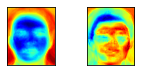

(2, 10304)

In [53]:
# get projected data ---> eigen space

proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

# plotting of eigen faces --> the information retained after applying lossing transformation
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(10,6,1+i)
    plt.imshow(img, cmap='jet')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

proj_data.shape

## Signature of Each Face

In [54]:
print(normalised_training_tensor.shape)
print(proj_data.shape)

w = np.array([np.dot(proj_data,img) for img in normalised_training_tensor])
w.shape

(60, 10304)
(2, 10304)


(60, 2)

## Testing

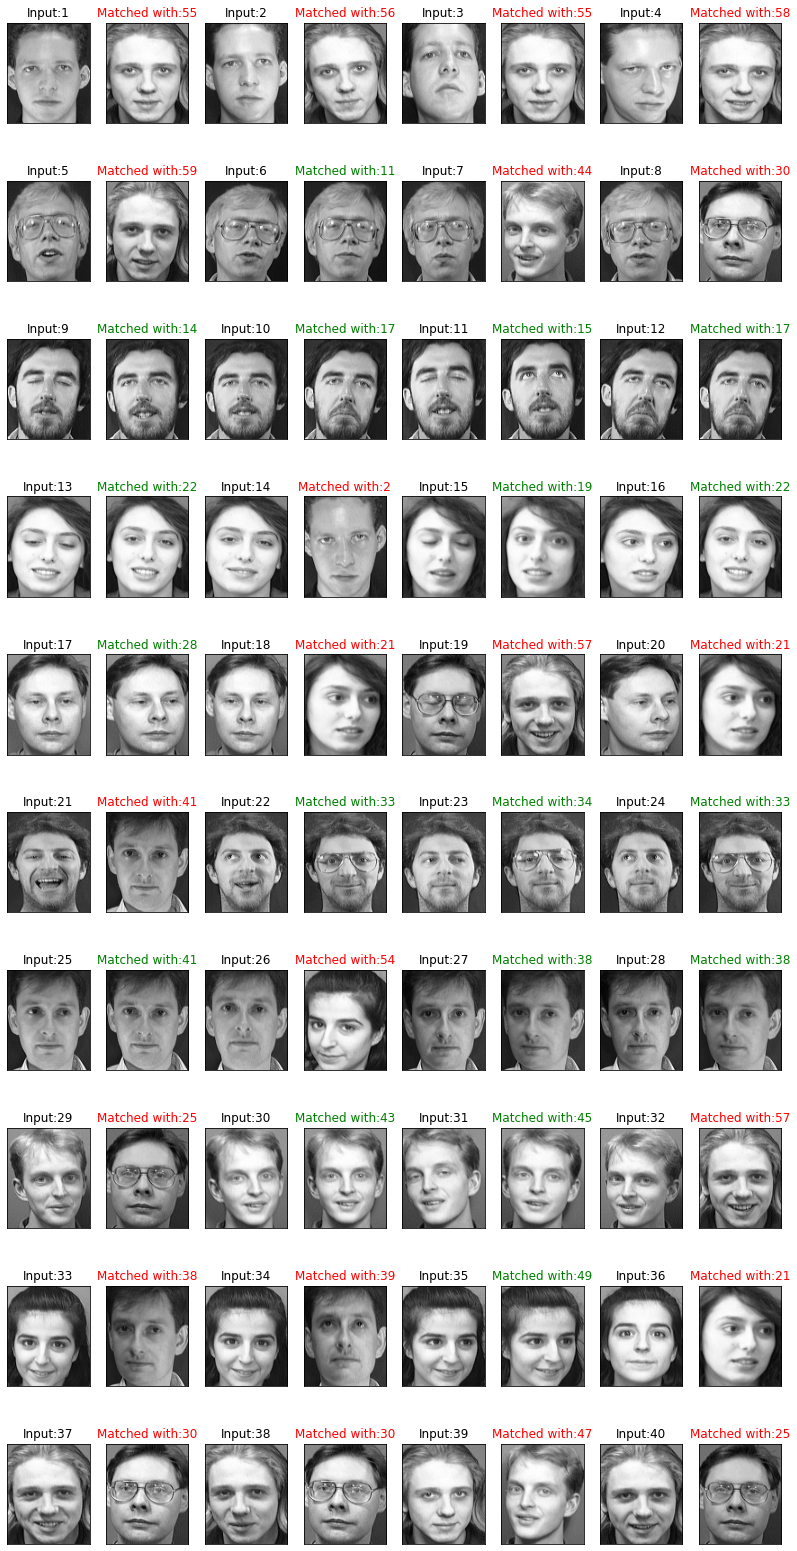

Correct predictions: 18/40 = 45.0%


In [55]:
# Testing all the images

count=0
num_images=0
correct_pred=0
def recogniser(img_number,proj_data,w):
    global count,highest_min,num_images,correct_pred
    
    num_images          += 1
    unknown_face_vector = testing_tensor[img_number,:]
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(11,8,1+count)
    plt.imshow(unknown_face_vector.reshape(height,width), cmap='gray')
    plt.title('Input:'+str(img_number+1))
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector) # w_known --> projected test face
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    # print('norms::', norms[0])
    
    index = np.argmin(norms)
    
    # print('index::', index)
    # print('min::', np.min(norms))
    
    plt.subplot(11,8,1+count)
    
    set_number = int(img_number/4) #???
    # print('set what', set_number)
#     print(set_number)

    t0 = 15000000
    
#     if(img_number>=40):
#         print(norms[index])
    
    # if norms[index] < t0:
    # 1st Subject > 0 and < 6
    # 2nd Subject > 6 and 12
    if(index>=(6*set_number) and index<(6*(set_number+1))):
        plt.title('Matched with:'+str(index+1), color='g')
        plt.imshow(training_tensor[index,:].reshape(height,width), cmap='gray')
        correct_pred += 1
    else:
        plt.title('Matched with:'+str(index+1), color='r')
        plt.imshow(training_tensor[index,:].reshape(height,width), cmap='gray')
    # else:
    #     if(img_number>=40):
    #         plt.title('Unknown face!', color='g')
    #         correct_pred += 1
    #     else:
    #         plt.title('Unknown face!', color='r')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
    count+=1

fig = plt.figure(figsize=(10, 10))
for i in range(len(testing_tensor)):
    recogniser(i,proj_data,w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

## Plotting of Accuracy vs k-value for eigenvectors

Total Number of eigenvectors: 60


Text(0.5, 1.0, 'Accuracy vs. k-value')

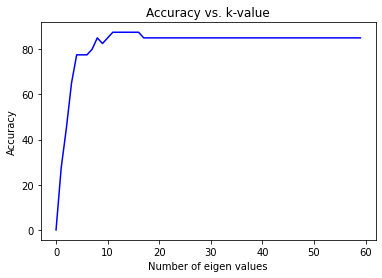

In [56]:
accuracy = np.zeros(len(eigvalues_sort))

def tester(img_number,proj_data,w,num_images,correct_pred):
    
    num_images          += 1
    unknown_face_vector = testing_tensor[img_number,:]
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    set_number = int(img_number/4)

    t0 = 15000000
    
    # if norms[index] < t0:
    if(index>=(6*set_number) and index<(6*(set_number+1))):
      correct_pred += 1
    # else:
    #     if(img_number>=40):
    #         correct_pred += 1
    
    return num_images,correct_pred

def calculate(k):
    
#     print("k:",k)
    reduced_data = np.array(eigvectors_sort[:k]).transpose()
    
    proj_data = np.dot(training_tensor.transpose(),reduced_data)
    proj_data = proj_data.transpose()
    
    w = np.array([np.dot(proj_data,img) for img in normalised_training_tensor])
    
    num_images=0
    correct_pred=0
    
    for i in range(len(testing_tensor)):
        num_images,correct_pred = tester(i,proj_data,w,num_images,correct_pred)
    
    accuracy[k] = correct_pred/num_images*100.00
    
print('Total Number of eigenvectors:',len(eigvalues_sort))
for i in range(1,len(eigvalues_sort)):
    calculate(i)
    
fig, axi = plt.subplots()  
axi.plot(np.arange(len(eigvalues_sort)), accuracy, 'b')  
axi.set_xlabel('Number of eigen values')  
axi.set_ylabel('Accuracy')  
axi.set_title('Accuracy vs. k-value') 

# Plot Decision Boundary PCA

In [66]:
len(training_tensor)
training_tensor=np.array(training_tensor)
print(training_tensor)
y=[]
for i in range(10):
  for j in range(6):
    y.append(i)
print(y)
y=np.array(y)
print(y)

[[ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 [ 63.  53.  35. ...  41.  10.  24.]
 ...
 [106. 105. 106. ...  32.  31.  28.]
 [111. 110. 111. ...  35.  40.  29.]
 [105. 104. 104. ...  43.  41.  24.]]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9]
[0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6
 6 6 6 6 6 7 7 7 7 7 7 8 8 8 8 8 8 9 9 9 9 9 9]


In [67]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(training_tensor).transform(training_tensor)
print(len(training_tensor),len(training_tensor[0]))

60 10304


In [70]:
target_names=[]
for i in range(10):
  target_names.append(str(i))
print(target_names)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
explained variance ratio (first two components): [0.1774735  0.12520096]


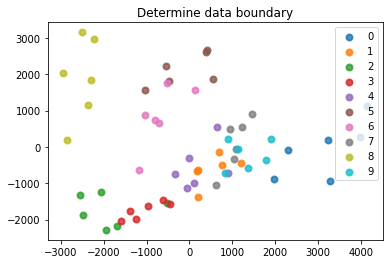

In [71]:
plt.figure()
colors = ['navy', 'turquoise']
lw = 2
t=[]
for i in range(40):
  t.append(i)               
for i, target_name in zip( t, target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Determine data boundary')
plt.show()